# Operations

## Vector Addition

> $\mathbf{C} = (A_x + B_x, A_y + B_y)$

## Vector Magnitude - 2D

> $\|\mathbf{A}\| = \sqrt{A_x^2 + A_y^2}$

## Vector Magnitude - 3D

> $\|\mathbf{A}\| = \sqrt{A_x^2 + A_y^2 + A_z^2}$

## Scaling a Vector

> $k\mathbf{A} = (kA_x, kA_y)$

## Distance Between Two Points - 2D

> $d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$

## Distance Between Two Points - 3D

> $d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2 + (z_2 - z_1)^2}$

## Area of a Polygon (Shoelace Formula)

> $A = \frac{1}{2}\left| \sum_{i=1}^{n-1} x_i y_{i+1} + x_n y_1 - \sum_{i=1}^{n-1} x_{i+1} y_i - x_1 y_n \right|$

**The x component of a vector can be found using the cosine of the angle. If $Q$ is the angle the vector makes with the positive x-axis, and $V$ is the magnitude of the vector, the x component $V_x$ is given by**:
> $V_x = V \cdot \cos(\theta)$

**The y component of a vector is determined using the sine of the angle. The y component $V_y$ is given by:**:
> $V_y = V \cdot \sin(\theta)$

**Tangent of angle can be found**:
> $\tan(Q) = \frac{V_y}{V_x}$

**If you know the components of the vector, you can find the direction angle $Q$ using the arctangent function. Assuming $V_x$ and $V_y$ are the x and y components of the vector, respectively**:
> $\theta = \arctan\left(\frac{V_y}{V_x}\right)$

**Polar coordinates provide an alternative way to represent points in a plane. Unlike Cartesian coordinates, which use a grid of vertical and horizontal lines, polar coordinates measure distances and angles from a fixed point (the origin) and a fixed line (the polar axis, usually the positive x-axis in Cartesian coordinates).**

> **Polar Coordinate Formulas**

**Radius (r)**: The distance from the point to the origin.

**Angle (θ)**: The angle between the polar axis and the line segment from the origin to the point.

> If you have a point in polar coordinates (r,θ) and you want to convert it to Cartesian coordinates (x,y), you use the following formulas:

X Coordinate: $x = r \cos(\theta)$

Y Coordinate: $y = r \sin(\theta)$

or,

> From Cartesian to Polar:

Radius: $r = \sqrt{x^2 + y^2}$

Angle: $\theta = \arctan\left(\frac{y}{x}\right)$ or $\theta = \text{atan2}(y, x)$


# General Approaches

## Util-Class

In [1]:
class CLASSINIT:
  pass
class PROCESS:
  pass
class RESULT:
  pass
class POINT:
  pass
class OPERATIONS:
  pass
class VECTOR:
  pass
class DOCUMENTATION:
  pass
class ERROR:
  pass
class NULL:
  pass

## Util-Modules

In [59]:
from math import sqrt,pi,ceil,floor,radians,cos,sin,atan2,atan,degrees
from matplotlib.collections import PatchCollection
from matplotlib.pyplot import xlim,ylim
import matplotlib,matplotlib.patches,matplotlib.pyplot as plt
import numpy as np
import os

# Process Parameters and Requirements

## Definitions

> particularly for plotting polygons, points, arrows, and segments on a coordinate plane.

In [3]:
class COLORS(object):
  BLUE = "C0"
  BLACK = "k"
  RED = "C3"
  GREEN = "C2"
  PURPLE = "C4"
  ORANGE = "C2"
  GRAY = "GRAY"

**Polygons are 2D shapes with straight sides. The vertices are points in a 2D plane.**

In [4]:
class Polygon(object):
  def __init__(self,*vertices,color:str=COLORS.BLUE,fill:None=None,alpha:float=0.4)->CLASSINIT:
    self.vertices = vertices
    self.color = color
    self.fill = fill
    self.alpha = alpha
  def __str__(self)->str:
    return "POLYGON PARAMETERS AND RETURNS - SUB(SCRIPT)"
  def __call__(self)->NULL|None:
    return None

**Points are locations in space defined by coordinates.**

In [5]:
class Points(object):
  def __init__(self,*vectors,color:str=COLORS.BLACK)->CLASSINIT:
    self.vectors = vectors
    self.color = color
  def __str__(self)->str:
    return "POINTS PARAMETERS AND RETURNS - SUB(SCRIPT)"
  def __call__(self)->NULL|None:
    return None

**Arrows can represent vectors, which have both magnitude and direction. The length and orientation of the arrow depict this.**

_Vectors in a 2D plane can be represented as arrows, where the tail is the starting point and the tip is the end point. In vector operations, vectors can be added, scaled, or their magnitudes calculated._

In [6]:
class Arrow(object):
  def __init__(self,tip:CLASSINIT,tail:tuple=(0,0),color:str=COLORS.RED)->CLASSINIT:
    self.tip = tip
    self.tail = tail
    self.color = color
  def __str__(self)->str:
    return "ARROW PARAMETERS AND RETURNS - SUB(SCRIPT)"
  def __call__(self)->NULL|None:
    return None

**A segment is part of a line bounded by two distinct end points.**

In [7]:
class Segment(object):
  def __init__(self,startPoint:tuple,endPoint:tuple,color:str=COLORS.BLUE)->CLASSINIT:
    self.startPoint = startPoint
    self.endPoint = endPoint
    self.color = color
  def __str__(self)->str:
    return "SEGMENT PARAMETERS AND RETURNS - SUB(SCRIPT)"
  def __call__(self)->NULL|None:
    return None

## Functions

In [8]:
CreateDirectory = lambda x: os.mkdir(x) if not os.path.exists(x) else None

**Iterates over a list of objects to extract their coordinates. Supports Polygon, Points, Arrow, and Segment objects.**

_It's a utility to handle different geometric objects uniformly._

In [9]:
def ExtractVectors(objectList:list)->OPERATIONS:
  for obj in objectList:
    if type(obj) == Polygon:
      for vertice in obj.vertices:
        yield vertice
    elif type(obj) == Points:
      for vector in obj.vectors:
        yield vector
    elif type(obj) == Arrow:
      yield obj.tip
      yield obj.tail
    elif type(obj) == Segment:
      yield obj.startPoint
      yield obj.endPoint
    else:
      raise TypeError("OBJECT IS NOT DEFINED IN OPERATIONS")

**The main function to create a plot with the specified objects.**

_It includes:_

- Calculating boundaries and padding for the plot.
- Setting up a grid, axes, and origin point.
- Plotting each object based on its type.
- Adjusting the aspect ratio and saving the plot if needed.

In [10]:
def DrawOperation(*objectList,origin:bool=True,axes:bool=True,grid:tuple=(1,1),niceAspect:bool=True,width:int=6,saveAs:None=None)->PROCESS:
  """
  The floor function is a mathematical operation that rounds a given number down to the nearest integer that is less than or equal to it.
  The ceil function rounds up the resulting value to the nearest whole number.
  plt.gca(): This function call gets the current Axes instance on the current figure matching the given keyword args, or creates one.
  set_xticks: This method sets the x-ticks (i.e., the locations along the x-axis where the grid lines and tick marks should appear).
  set_yticks: This method sets the y-ticks (i.e., the locations along the y-axis where the grid lines and tick marks should appear).
  set_axisbelow(True): This method ensures that the grid lines are drawn below the plot elements (like points, lines, etc.). It makes the plot elements more prominent against the grid background.
  axhline: This method adds a horizontal line across the axis. In this context, it's used to add a horizontal line across the entire width of the axes.
  axvline: This method adds a vertical line across the axis. In this context, it's used to add a vertical line across the entire width of the axes.
  set_size_inches: This is a method of the figure object. It sets the size of the figure in inches.
  """
  vectors = list(ExtractVectors(objectList))
  xs,ys = zip(*vectors)
  maxX,maxY,minX,minY = max(0,*xs),max(0,*ys),min(0,*xs),min(0,*ys)
  if grid:
    """
    xPadding and yPadding are being calculated to determine the amount of padding or margin to be added around the plotted elements in a graph.
    """
    xPadding = max(ceil(0.05*(maxX-minX)),grid[0])
    yPadding = max(ceil(0.05*(maxY-minY)),grid[1])
    def RoundUpToMultiple(value:int or float,size:int or float)->OPERATIONS:
      "This function rounds value up to the nearest multiple of size."
      return floor((value+size)/size)*size
    def RoundDownToMultiple(value:int or float,size:int or float)->OPERATIONS:
      "This function rounds value down to the nearest multiple of size."
      return -floor((-value-size)/size)*size
    plt.xlim(
        floor((minX-xPadding)/grid[0])*grid[0],
        ceil((maxX+xPadding)/grid[0])*grid[0]
    )
    plt.ylim(
        floor((minY-yPadding)/grid[1])*grid[1],
        ceil((maxY+yPadding)/grid[1])*grid[1]
    )
  if origin:
    plt.scatter([0],[0],color=COLORS.BLACK,marker="x")
  if grid:
    """
    In this case, it generates x-tick values starting from the minimum x-limit (plt.xlim()[0]), up to the maximum x-limit (plt.xlim()[1]), with intervals of grid[0].
    This evenly spaces the x-ticks according to the specified grid size.
    """
    plt.gca().set_xticks(
        np.arange(
            plt.xlim()[0],
            plt.xlim()[1],
            grid[0]
        )
    )
    plt.gca().set_yticks(
        np.arange(
            plt.ylim()[0],
            plt.ylim()[1],
            grid[1]
        )
    )
    plt.grid(True)
    plt.gca().set_axisbelow(True)
  if axes:
    plt.gca().axhline(linewidth=2,color=COLORS.BLACK)
    plt.gca().axvline(linewidth=2,color=COLORS.BLACK)
  for obj in objectList:
    """
    The provided code snippet is a part of a Python script using Matplotlib for visualizing different geometric objects such as polygons, points, arrows, and segments.
    The logic is to iterate through a list of these objects and plot each one according to its type and properties.
    """
    if type(obj) == Polygon:
      for i in range(0,len(obj.vertices)):
        x1, y1 = obj.vertices[i]
        x2, y2 = obj.vertices[(i+1)%len(obj.vertices)]
        plt.plot([x1,x2],[y1,y2], color=obj.color)
        if obj.fill:
          xs = [v[0] for v in obj.vertices]
          ys = [v[1] for v in obj.vertices]
          plt.gca().fill(xs,ys,obj.fill,alpha=obj.alpha)
    elif type(obj) == Points:
      xs = [v[0] for v in obj.vectors]
      ys = [v[1] for v in obj.vectors]
      plt.scatter(xs,ys,color=obj.color)
    elif type(obj) == Arrow:
      tip, tail = obj.tip, obj.tail
      tip_length = (xlim()[1] - xlim()[0]) / 20.
      length = sqrt((tip[1]-tail[1])**2 + (tip[0]-tail[0])**2)
      new_length = length - tip_length
      new_y = (tip[1] - tail[1]) * (new_length / length)
      new_x = (tip[0] - tail[0]) * (new_length / length)
      plt.gca().arrow(tail[0], tail[1], new_x, new_y,
      head_width=tip_length/1.5, head_length=tip_length,
      fc=obj.color, ec=obj.color)
    elif type(obj) == Segment:
      x1, y1 = obj.startPoint
      x2, y2 = obj.endPoint
      plt.plot([x1,x2],[y1,y2], color=obj.color)
    else:
      raise TypeError("OBJECT IS NOT DEFINED IN OPERATIONS")
  figure = plt.gcf()
  if niceAspect:
    coordsHeight = (ylim()[1]-ylim()[0])
    coordsWidth = (xlim()[1]-xlim()[0])
    figure.set_size_inches(width,width*coordsHeight/coordsWidth)
  if saveAs is not None:
    CreateDirectory("figure_results")
    savePath = os.path.join(os.getcwd(),f"figure_results/{saveAs}")
    plt.savefig(savePath)
  plt.tight_layout()
  plt.show()

# Objects Examples

In [11]:
%load_ext autoreload
%autoreload 2

## Points

In [12]:
points = [(4,6),(6,8)]

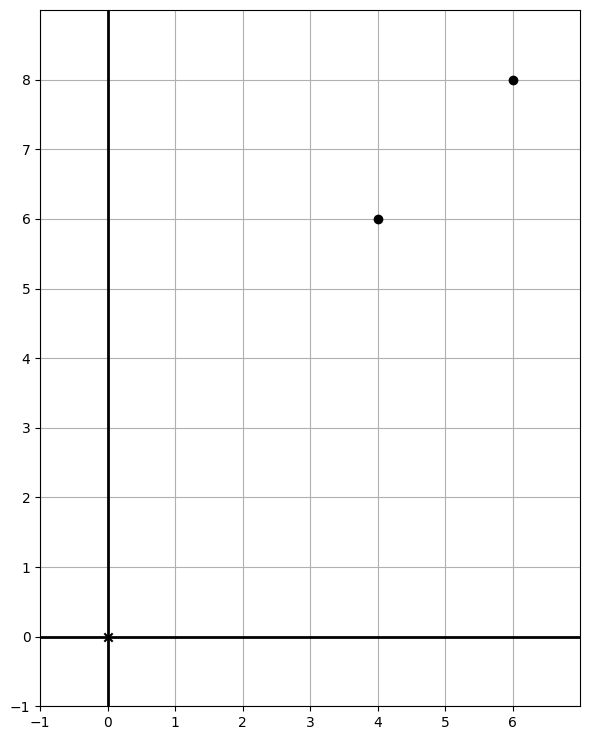

In [13]:
DrawOperation(
    Points(*points)
)

## Segments

In [14]:
points = [(4,6),(6,8)]
segments = [(4,6),(6,8)]

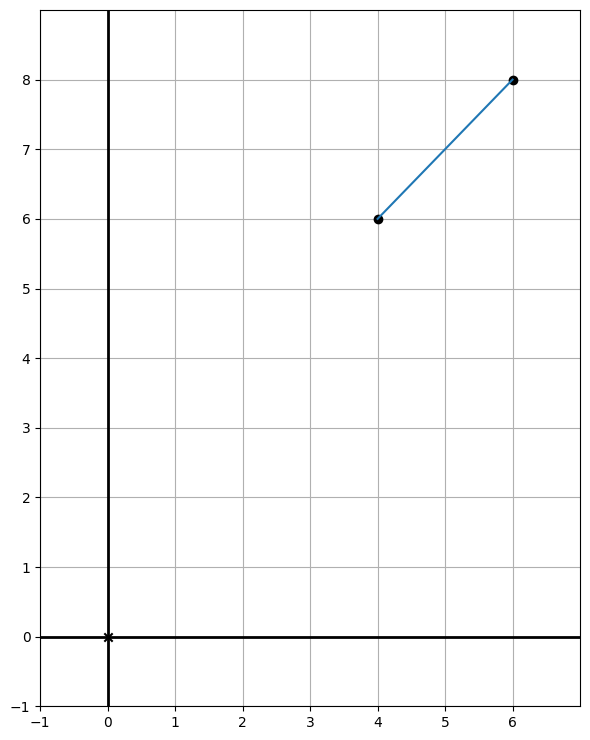

In [15]:
DrawOperation(
    Points(*points),
    Segment(*segments)
)

## Polygons

In [16]:
points = [(4,6),(6,8),(-4,6),(-6,8),(4,-6),(6,-8),(-4,-6),(-6,-8)]

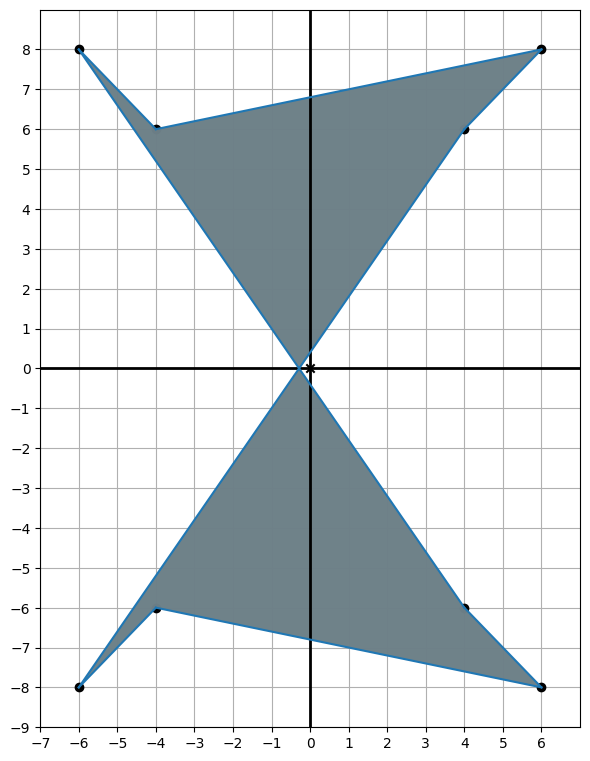

In [17]:
DrawOperation(
    Points(*points),
    Polygon(*points,fill=True)
)

In [18]:
squarePoints = [(1,0),(1,1),(0,1),(0,0)]

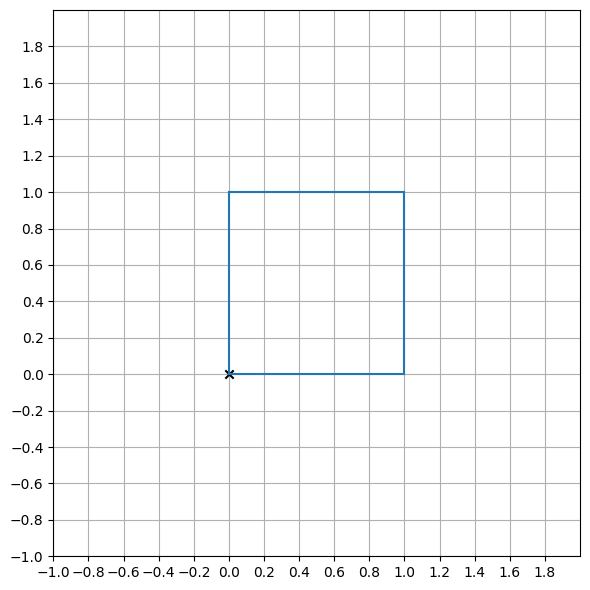

In [19]:
DrawOperation(
    Polygon(*squarePoints),
    grid=(0.2,0.2),
    axes=None
)

## Arrow

In [20]:
arrowPointOne = [(2,6),(4,6)]
arrowPointTwo = [(2,3),(4,3)]

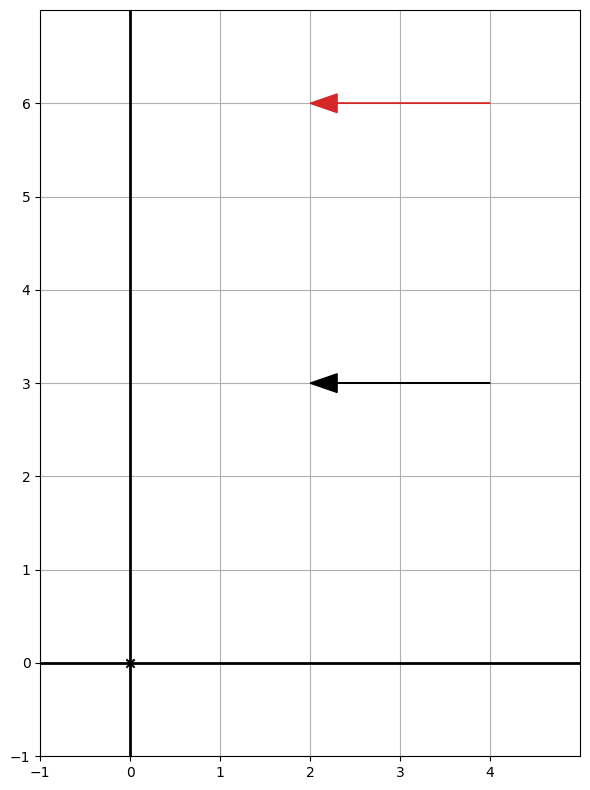

In [21]:
DrawOperation(
    Arrow(*arrowPointOne),
    Arrow(*arrowPointTwo,color=COLORS.BLACK)
)

# Applications

In [22]:
def DrawSingleVector(ax:CLASSINIT,vector:tuple,origin:tuple,color:str=COLORS.BLUE,label:str="")->PROCESS:
  ax.arrow(
      origin[0],
      origin[1],
      vector[0],
      vector[1],
      head_width=0.2,
      head_length=0.2,
      fc=color,
      ec=color,
      length_includes_head=True,
      label=label
  )

## Vector Addition

In [23]:
arrowPointOne = [(6,10),(2,8)]
arrowPointTwo = [(8,10),(4,8)]

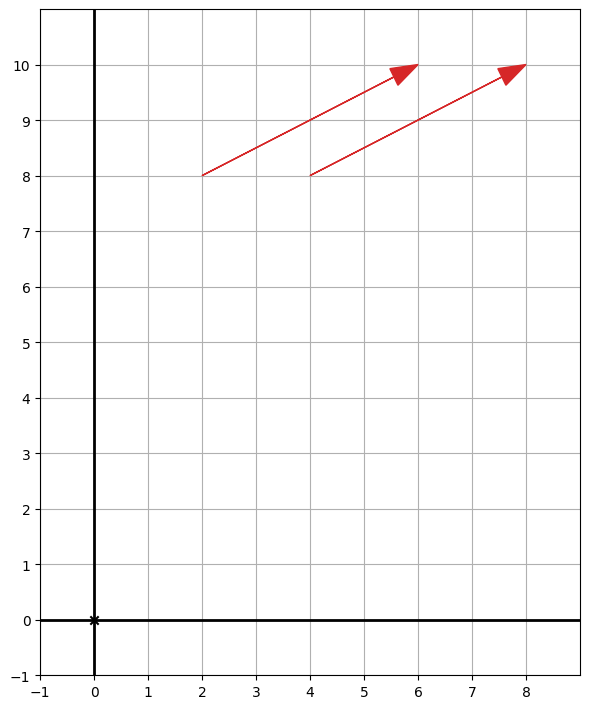

In [24]:
DrawOperation(
    Arrow(*arrowPointOne),
    Arrow(*arrowPointTwo)
)

In [25]:
def VectorAdditionSingle(vectorOne:tuple,vectorTwo:tuple)->OPERATIONS:
  return (vectorOne[0]+vectorTwo[0],vectorOne[1],vectorTwo[1])

In [26]:
def VectorAddition(*vectors:tuple or list)->OPERATIONS:
  return (sum([v[0] for v in vectors]),sum([v[1] for v in vectors]))

In [27]:
vectorOne = (2,5)
vectorTwo = (2,8)
vectorAddition = VectorAddition(
    vectorOne,
    vectorTwo
)
print(f"Vector Addition: {vectorAddition}")

Vector Addition: (4, 13)


In [28]:
vectorW = (sqrt(2),sqrt(3))
vectorWScaled = (pi*sqrt(2),pi*sqrt(3))

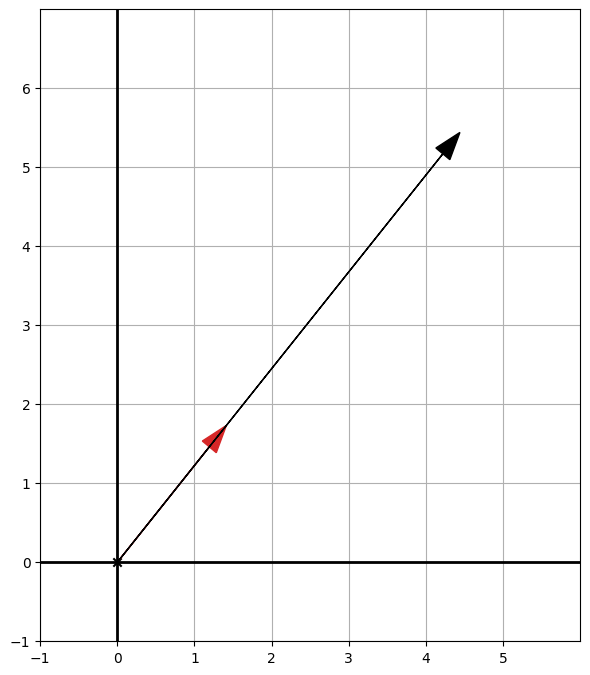

In [29]:
DrawOperation(
    Arrow(vectorW,color=COLORS.RED),
    Arrow(vectorWScaled,color=COLORS.BLACK)
)

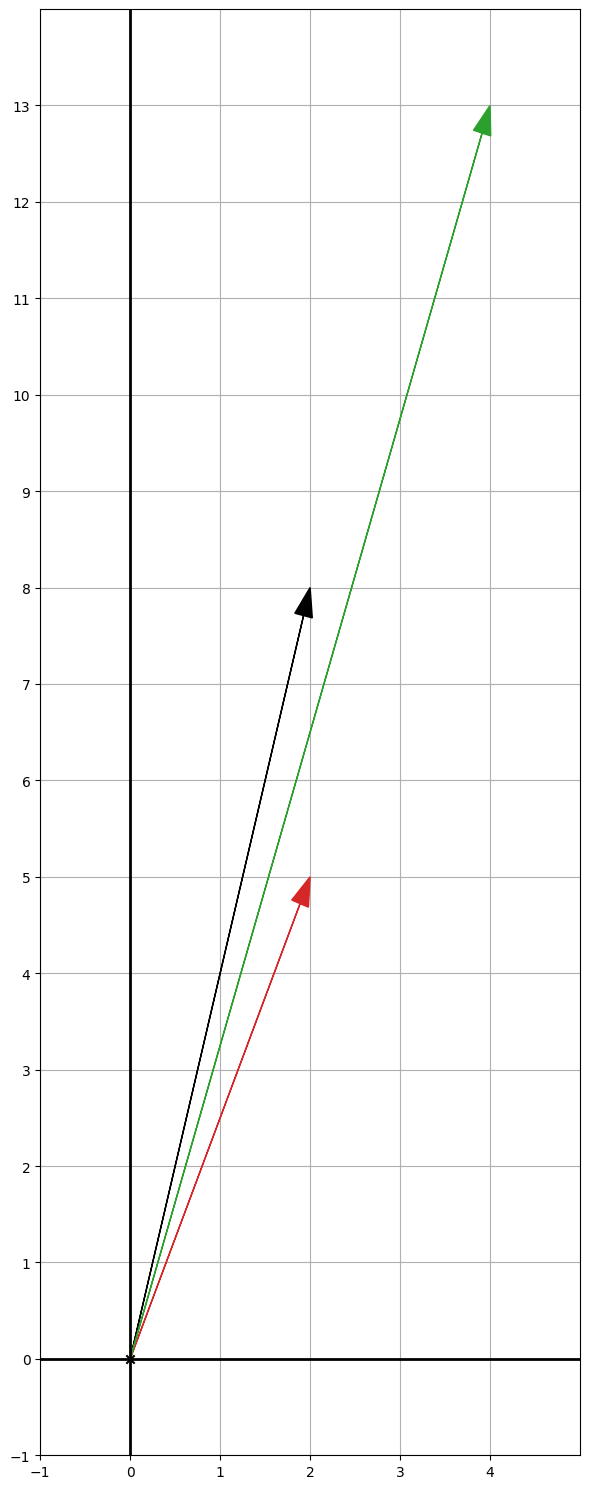

In [30]:
DrawOperation(
    Arrow(vectorOne,color=COLORS.RED),
    Arrow(vectorTwo,color=COLORS.BLACK),
    Arrow(vectorAddition,color=COLORS.GREEN)
)

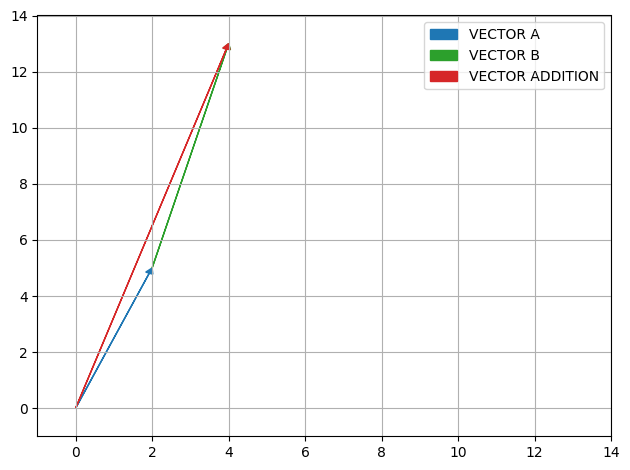

In [31]:
figure,axs = plt.subplots()
DrawSingleVector(axs,vectorOne,(0,0),label="VECTOR A")
DrawSingleVector(axs,vectorTwo,vectorOne,color=COLORS.GREEN,label="VECTOR B")
DrawSingleVector(axs,vectorAddition,(0,0),color=COLORS.RED,label="VECTOR ADDITION")
maxLimit = max(vectorAddition)+1
plt.xlim(-1,maxLimit)
plt.ylim(-1,maxLimit)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [32]:
def VectorAdditionMagnitude(vectorOne:tuple,vectorTwo:tuple)->OPERATIONS:
  cx = vectorOne[0]+vectorTwo[0]
  cy = vectorOne[1]+vectorTwo[1]
  return sqrt(cx**2+cy**2)

In [33]:
magnitudeVectorAddition = VectorAdditionMagnitude(vectorOne,vectorTwo)
print(f"Magnitude For Vector Addition: {magnitudeVectorAddition}")

Magnitude For Vector Addition: 13.601470508735444


In [34]:
vectorOne = (2,6)
vectorTwo = (5,11)
vectorThree = (1,8)
vectorFour = (3,7)

In [35]:
vectorAddition = VectorAddition(
    vectorOne,
    vectorTwo,
    vectorThree,
    vectorFour
)
print(f"Vector Addition Point: {vectorAddition}")

Vector Addition Point: (11, 32)


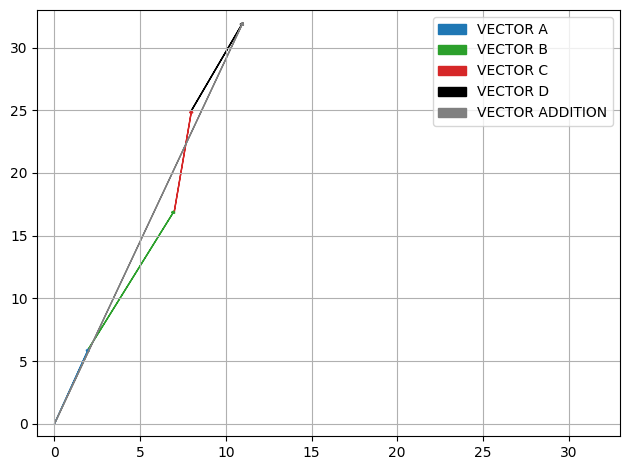

In [36]:
figure,axs = plt.subplots()
DrawSingleVector(axs,vectorOne,(0,0),label="VECTOR A")
DrawSingleVector(axs,vectorTwo,vectorOne,color=COLORS.GREEN,label="VECTOR B")
DrawSingleVector(axs,vectorThree,(vectorOne[0]+vectorTwo[0],vectorOne[1]+vectorTwo[1]),color=COLORS.RED,label="VECTOR C")
DrawSingleVector(axs,vectorFour,(vectorOne[0]+vectorTwo[0]+vectorThree[0],vectorOne[1]+vectorTwo[1]+vectorThree[1]),color=COLORS.BLACK,label="VECTOR D")
DrawSingleVector(axs,vectorAddition,(0,0),color=COLORS.GRAY,label="VECTOR ADDITION")
maxLimit = max(vectorAddition)+1
plt.xlim(-1,maxLimit)
plt.ylim(-1,maxLimit)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

## Vector Subtraction

In [37]:
def VectorSubtraction(vectorOne:tuple,vectorTwo:tuple)->OPERATIONS:
  return (vectorOne[0]-vectorTwo[0],vectorOne[1]-vectorTwo[1])

In [38]:
vectorOne = (2,6)
vectorTwo = (4,10)
vectorSubtraction = VectorSubtraction(vectorOne,vectorTwo)
print(f"Vector Subtraction: {vectorSubtraction}")

Vector Subtraction: (-2, -4)


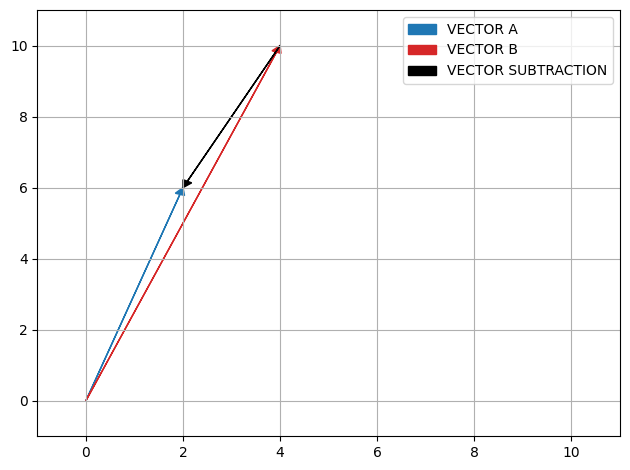

In [39]:
fig,axs = plt.subplots()
DrawSingleVector(axs,vectorOne,(0,0),color=COLORS.BLUE,label="VECTOR A")
DrawSingleVector(axs,vectorTwo,(0,0),color=COLORS.RED,label="VECTOR B")
DrawSingleVector(axs,vectorSubtraction,vectorTwo,color=COLORS.BLACK,label="VECTOR SUBTRACTION")
maxLimit = max(max(vectorOne),max(vectorTwo),max(vectorSubtraction))+1
plt.xlim(-1,maxLimit)
plt.ylim(-1,maxLimit)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

## Vector Components

**The x component of a vector can be found using the cosine of the angle. If $Q$ is the angle the vector makes with the positive x-axis, and $V$ is the magnitude of the vector, the x component $V_x$ is given by**:
> $V_x = V \cdot \cos(\theta)$

**The y component of a vector is determined using the sine of the angle. The y component $V_y$ is given by:**:
> $V_y = V \cdot \sin(\theta)$

**Tangent of angle can be found**:
> $\tan(Q) = \frac{V_y}{V_x}$

**If you know the components of the vector, you can find the direction angle $Q$ using the arctangent function. Assuming $V_x$ and $V_y$ are the x and y components of the vector, respectively**:
> $\theta = \arctan\left(\frac{V_y}{V_x}\right)$

In [42]:
def PlotVectorComponents(ax:CLASSINIT,vector:tuple,origin:tuple=(0,0),color:str=COLORS.BLUE)->OPERATIONS:
  ax.arrow(
      origin[0],
      origin[1],
      vector[0],
      vector[1],
      head_width=0.2,
      head_length=0.2,
      fc=color,
      ec=color,
      length_includes_head=True,
      label="VECTOR"
  )
  ax.arrow(
      origin[0],
      origin[1],
      vector[0],
      0,
      head_width=0.1,
      head_length=0.2,
      fc=COLORS.RED,
      ec=COLORS.RED,
      length_includes_head=True,
      linestyle="dotted",
      label="X COMPONENT"
  )
  ax.arrow(
      origin[0],
      origin[1],
      0,
      vector[1],
      head_width=0.1,
      head_length=0.2,
      fc=COLORS.GREEN,
      ec=COLORS.GREEN,
      length_includes_head=True,
      linestyle="dotted",
      label="Y COMPONENT"
  )

In [43]:
vector = (4,3)

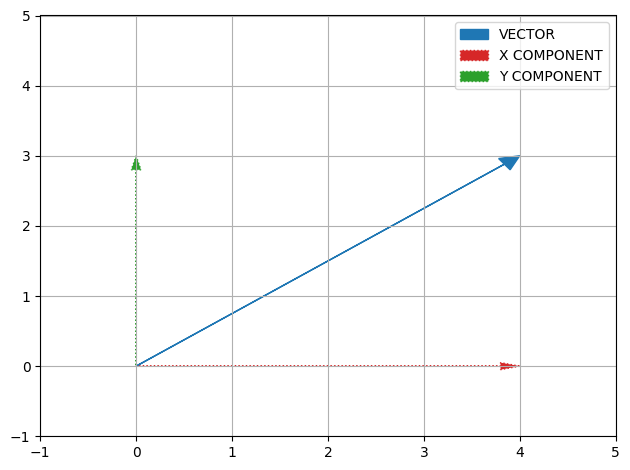

In [44]:
fig,axs = plt.subplots()
PlotVectorComponents(axs,vector)
maxLimit = max(vector)+1
plt.xlim(-1,maxLimit)
plt.ylim(-1,maxLimit)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [72]:
def VectorComponents(magnitude:int or float,angleDegree:int or float)->OPERATIONS:
  angleRadian = radians(angleDegree)
  xComponent = magnitude*cos(angleRadian)
  yComponent = magnitude*sin(angleRadian)
  return (xComponent,yComponent)

In [66]:
def VectorAngle(xComponent:int or float,yComponent:int or float)->OPERATIONS:
  tanAngle = yComponent/xComponent
  angleRadian = atan(tanAngle)
  angleDegree = degrees(angleRadian)
  return angleDegree

In [61]:
def VectorMagnitude(vector:tuple)->OPERATIONS:
  return sqrt(vector[0]**2+vector[1]**2)

In [62]:
vector = (-4.0,2.9)

In [63]:
magnitude = VectorMagnitude(vector)
print(f"Magnitude of Vector: {round(magnitude,3)}")

Magnitude of Vector: 4.941


In [73]:
xComponent,yComponent = VectorComponents(magnitude=round(magnitude,3),angleDegree=-35) # angle is an example
print(f"X-Component of Vector: {round(xComponent,2)}\nY-Component of Vector: {round(yComponent,2)}")

X-Component of Vector: 4.05
Y-Component of Vector: -2.83


In [74]:
angleVector = VectorAngle(xComponent=xComponent,yComponent=yComponent)
print(f"Angle of Vector: {angleVector}")

Angle of Vector: -35.0


### Example - Question

> A rescue party for a missing child follows a search dog named Trooper. Trooper wanders a lot and makes many trial sniffs along many different paths. Trooper eventually finds the child and the story has a happy ending, but his displacements on various legs seem to be truly convoluted. On one of the legs he walks 200.0 m southeast, then he runs north some 300.0 m. On the third leg, he examines the scents carefully for 50.0 m in the direction 30 degrees west of north. On the fourth leg, Trooper goes directly south for 80.0 m, picks up a fresh scent and turns 23 degrees west of south for 150.0 m.  Find the scalar components of Trooper’s displacement vectors and his displacement vectors in vector component form for each leg.

In [75]:
def DisplacementVector(magnitude:int or float,directionAngle:int or float)->OPERATIONS:
  angleRadian = radians(directionAngle)
  xComponent = magnitude*cos(angleRadian)
  yComponent = magnitude*sin(angleRadian)
  return (xComponent,yComponent)

In [76]:
legs = [
    {"magnitude":200,"angle":-45}, # Southeast
    {"magnitude":300,"angle":90}, # North
    {"magnitude":50,"angle":120}, # 30 degrees West of North
    {"magnitude":80,"angle":-90}, # South
    {"magnitude":150,"angle":-113} # 23 degrees West of South
]

In [77]:
displacementVectors = [DisplacementVector(leg["magnitude"],leg["angle"]) for leg in legs]

In [80]:
for index,vector in enumerate(displacementVectors):
  print(f"LEG {index+1}:\nX-component: {round(vector[0],2)}m, Y-component: {round(vector[1],2)}m\nVector Form: ({round(vector[0],2)},{round(vector[1],2)})\n\n")

LEG 1:
X-component: 141.42m, Y-component: -141.42m
Vector Form: (141.42,-141.42)


LEG 2:
X-component: 0.0m, Y-component: 300.0m
Vector Form: (0.0,300.0)


LEG 3:
X-component: -25.0m, Y-component: 43.3m
Vector Form: (-25.0,43.3)


LEG 4:
X-component: 0.0m, Y-component: -80.0m
Vector Form: (0.0,-80.0)


LEG 5:
X-component: -58.61m, Y-component: -138.08m
Vector Form: (-58.61,-138.08)




## Polar Coordinates

**Polar coordinates provide an alternative way to represent points in a plane. Unlike Cartesian coordinates, which use a grid of vertical and horizontal lines, polar coordinates measure distances and angles from a fixed point (the origin) and a fixed line (the polar axis, usually the positive x-axis in Cartesian coordinates).**

> **Polar Coordinate Formulas**

**Radius (r)**: The distance from the point to the origin.

**Angle (θ)**: The angle between the polar axis and the line segment from the origin to the point.

> If you have a point in polar coordinates (r,θ) and you want to convert it to Cartesian coordinates (x,y), you use the following formulas:

X Coordinate: $x = r \cos(\theta)$

Y Coordinate: $y = r \sin(\theta)$

or,

> From Cartesian to Polar:

Radius: $r = \sqrt{x^2 + y^2}$

Angle: $\theta = \arctan\left(\frac{y}{x}\right)$ or $\theta = \text{atan2}(y, x)$

In [81]:
def PolarToCartesian(radius:int or float,angle:int or float)->OPERATIONS:
  angleRadian = radians(angle)
  xComponent = radius*cos(angleRadian)
  yComponent = radius*sin(angleRadian)
  return (xComponent,yComponent)

In [82]:
def CartesianToPolar(xComponent:int or float,yComponent:int or float)->OPERATIONS:
  radius = sqrt(xComponent**2+yComponent**2)
  angle = atan2(yComponent,xComponent)
  angleDegree = degrees(angle)
  return (radius,angleDegree)

### Example - Question

> A treasure hunter finds one silver coin at a location 20.0 m away from a dry well in the direction 20 degrees north of east and finds one gold coin at a location 10.0 m away from the well in the direction 20 degrees north of west. What are the polar and rectangular coordinates of these findings with respect to the well?

In [83]:
silverRadius = 20.0
silverAngle = 20 #East is 0 degrees, so North of East is positive angle
goldRadius = 10.0
goldAngle = 180-20 #West is 180 degrees, so North of West is 180 - angle

In [86]:
silverX,silverY = PolarToCartesian(silverRadius,silverAngle)
goldX,goldY = PolarToCartesian(goldRadius,goldAngle)
print(f"Silver: ({round(silverX,2)}m, {round(silverY,2)}m)\nGold: ({round(goldX,2)}m, {round(goldY,2)}m)")

Silver: (18.79m, 6.84m)
Gold: (-9.4m, 3.42m)
